Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 156 (delta 6), reused 12 (delta 3), pack-reused 137
Receiving objects: 100% (156/156), 19.32 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (64/64), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 112kB 8.9MB/s 
     |████████████████████████████████| 133kB 45.7MB/s 
     |████████████████████████████████| 57.7MB 1.2MB/s 
     |████████████████████████████████| 235kB 47.2MB/s 
     |████████████████████████████████| 614kB 46.1MB/s 
     |████████████████████████████████| 235kB 27.6MB/s 
     |████████████████████████████████| 307kB 48.8MB/s 
     |██████████████████████████

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [90]:
import plotly.express as pltx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random, time
import numpy as np

# print(df.columns) 
"""['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
   'latitude', 'longitude', 'price', 'street_address', 'interest_level',
   'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
   'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
   'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
   'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
   'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
   'garden_patio', 'wheelchair_access', 'common_outdoor_space']"""
  
print(df["price"].describe())


# Make linear regression model with variables
model = LinearRegression()
features = ["bedrooms"]
target = "price"
x_train = df[features]
y_train = df[target]
model.fit(x_train, y_train)


count    48818.000000
mean      3579.560982
std       1762.420875
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
random.seed(time.time()) # Randomize seed

def predict_price(bedrooms):
    y_predict = model.predict([[bedrooms]]) # Get predicition from model
    value = y_predict[0] # Predicted value
    coefficient = model.coef_[0] # Co-effecient / slope of line
    print("${:.2f} is the estimated price for a {}-bedroom square foot apartment in VYC.".format(value, bedrooms))
    print("(Each bedroom increase the apartment's value by ${:.2f})".format(coefficient))

predict_price(random.randint(1,20)) # Predict for bedrooms from 1-20

$15066.79 is the estimated price for a 15-bedroom square foot apartment in VYC.
(Each bedroom increase the apartment's value by $853.25)


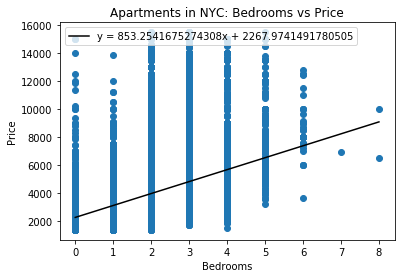

In [91]:
# Plot points and line of best fit
plt.scatter(df["bedrooms"], df["price"], label=None);
x = np.linspace(0, 8, 100)
y = model.coef_[0]*x+model.intercept_
plt.plot(x, y, color="black", label="y = {}x + {}".format(model.coef_[0], model.intercept_));

# Other graph stuff
plt.xlabel("Bedrooms");
plt.ylabel("Price");
plt.title("Apartments in NYC: Bedrooms vs Price");
plt.legend(loc="upper left");